# 5. KNeighborsRegressor

In [1]:
import joblib
import os

import pandas as pd

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt

import seaborn as sns

In [42]:
%run ./scripts/store_model_performance.py
%run ./scripts/atomic_benchmark_estimator.py

In [3]:
df = pd.read_pickle("./pickles/003.dataframe.data-preprocessing.pkl")

In [4]:
df

,price,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,review_scores_rating,...,Shampoo,Smoke alarm,Stove,TV,Washer,Wifi,Entire place,Hotel room,Private room,Shared room
0,53,0,0.000138,1,0,0.543185,0.012963,0.066667,0.0,1.0,...,0,0,0,0,1,1,1.0,0.0,0.0,0.0
1,120,0,0.000138,1,1,0.543180,0.013029,0.066667,0.0,1.0,...,1,0,0,0,1,1,1.0,0.0,0.0,0.0
2,89,0,0.000138,1,0,0.543124,0.012873,0.066667,0.0,1.0,...,0,0,0,1,1,1,1.0,0.0,0.0,0.0
3,58,0,0.000138,1,1,0.542730,0.012810,0.066667,0.0,1.0,...,0,0,0,1,0,1,1.0,0.0,0.0,0.0
4,60,0,0.000138,1,0,0.542833,0.012610,0.066667,0.0,1.0,...,0,0,0,1,1,1,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,120,0,0.000138,1,1,0.542522,0.012857,0.066667,0.0,1.0,...,0,1,0,1,1,1,1.0,0.0,0.0,0.0
279708,60,0,0.000138,1,1,0.543257,0.012956,0.066667,0.0,1.0,...,1,0,0,1,1,1,1.0,0.0,0.0,0.0
279709,50,0,0.000138,1,1,0.543189,0.013051,0.066667,0.0,1.0,...,1,0,0,0,1,1,1.0,0.0,0.0,0.0
279710,105,0,0.000138,1,1,0.542965,0.013229,0.066667,0.0,1.0,...,1,1,0,1,1,1,1.0,0.0,0.0,0.0


## 5.1. Split train test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], random_state=42, train_size=.75)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((209699, 63), (69900, 63), (209699,), (69900,))

In [7]:
X_train

,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,review_scores_rating,review_scores_accuracy,...,Shampoo,Smoke alarm,Stove,TV,Washer,Wifi,Entire place,Hotel room,Private room,Shared room
160755,0,0.000968,1,1,0.465485,0.069388,0.000000,0.000000,0.98,1.0,...,1,0,1,1,0,1,0.0,0.0,1.0,0.0
220908,0,0.000000,1,1,0.543280,0.013114,0.066667,0.010521,0.93,0.9,...,1,1,0,0,1,1,1.0,0.0,0.0,0.0
24800,0,0.000138,1,1,0.453291,-0.410921,0.200000,0.000000,1.00,1.0,...,0,1,1,1,1,1,1.0,0.0,0.0,0.0
157756,1,0.001106,1,0,0.453011,-0.410409,0.133333,0.000000,0.95,0.9,...,1,1,1,0,0,1,0.0,0.0,1.0,0.0
76686,0,0.000276,1,1,-0.375519,0.840476,0.133333,0.010521,0.98,1.0,...,1,1,1,1,1,1,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119880,0,0.000276,1,0,0.453488,-0.410847,0.000000,0.000000,0.93,0.9,...,1,1,0,0,0,1,0.0,0.0,1.0,0.0
259291,0,0.000138,1,1,0.543058,0.013010,0.333333,0.020408,0.92,0.9,...,1,1,1,1,1,1,1.0,0.0,0.0,0.0
131933,0,0.000415,1,1,-0.376483,0.840064,0.066667,0.000000,0.96,1.0,...,1,1,1,1,1,1,0.0,0.0,1.0,0.0
146868,0,0.000276,1,1,0.463658,0.068278,0.066667,0.000000,1.00,1.0,...,1,0,0,1,0,1,0.0,0.0,1.0,0.0


In [8]:
y_train

160755     65
220908     30
24800     148
157756     47
76686     175
         ... 
119880     80
259291    193
131933     69
146868     51
121959    950
Name: price, Length: 209699, dtype: Int64

## 5.2. Model

In [9]:
model_path = "./pickles/k-neighbors-regressor.joblib"

In [10]:
exists = os.path.exists(model_path)
exists

True

In [11]:
if exists:
    reg = joblib.load(model_path)
else:
    reg = KNeighborsRegressor(n_neighbors=10)

reg

KNeighborsRegressor(n_neighbors=10)

In [12]:
if exists:
    print("Already fitted")
else:
    reg.fit(X_train, y_train)

Already fitted


In [13]:
joblib.dump(reg, "./pickles/k-neighbors-regressor.joblib")

['./pickles/k-neighbors-regressor.joblib']

### 5.2.1. Score

In [14]:
score = reg.score(X_test, y_test)
score

0.07808972661090019

In [15]:
pred = reg.predict(X_test)

In [16]:
mae = mean_absolute_error(y_test, pred)
mae

457.5895092989986

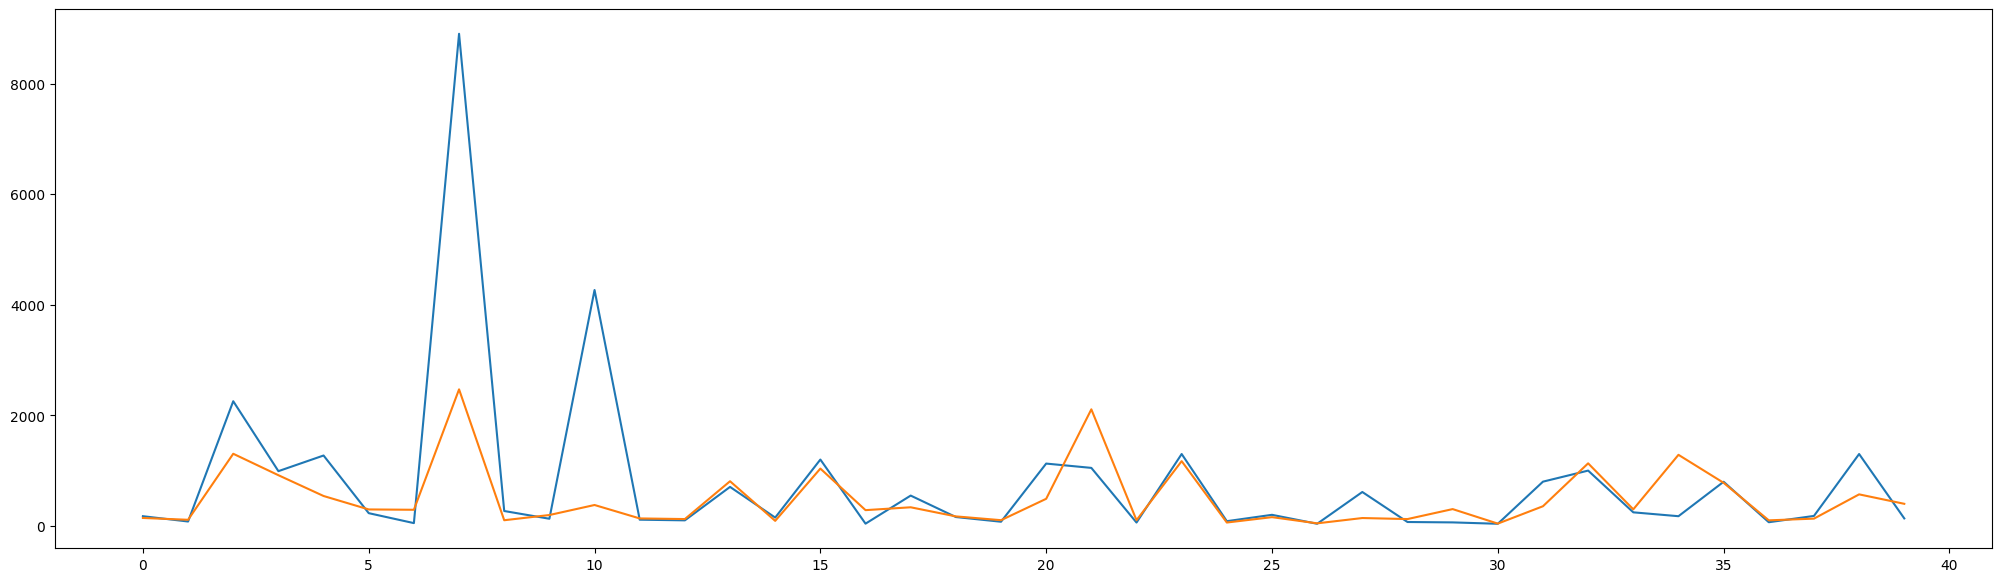

In [17]:
rng = slice(340, 380)

plt.figure(figsize=(25, 7))
plt.plot(y_test[rng].values)
plt.plot(pred[rng])

In [18]:
results = atomic_benchmark_estimator(reg, X_test[:5000], verbose=True)

atomic_benchmark runtimes: 0.005511045455932617 0.00700068473815918 0.018999576568603516


<Axes: >

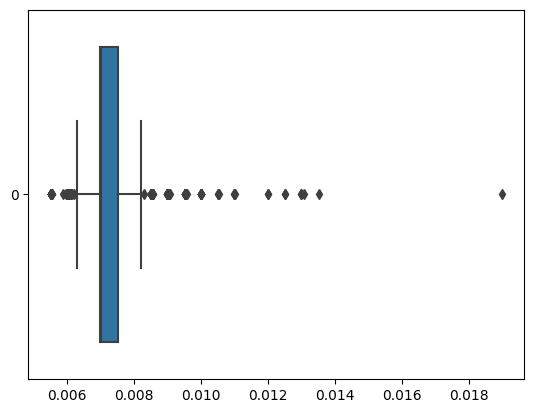

In [19]:
sns.boxplot(results, orient="h")

In [20]:
store_model_performance(
    model_name="KNeighborsRegressor",
    R2_score=score,
    mae=mae,
    avarage_predication_time=results.mean(),
    parameters=dict(n_neighbors=10),
)

## 5.3. GridSearchCV

In [21]:
grid_path = "./pickles/k-neighbors-regressor-grid-search-cv.joblib"

In [22]:
grid_exists = os.path.exists(grid_path)
grid_exists

True

In [23]:
if grid_exists:
    grid = joblib.load(grid_path)
else:
    grid = GridSearchCV(
        reg,
        {"n_neighbors": list(range(1, 1000, 100))},
        cv=4,
        scoring='neg_mean_absolute_error',
        verbose=3,
        n_jobs=-1,
    )

grid

GridSearchCV(cv=4, estimator=KNeighborsRegressor(n_neighbors=10), n_jobs=-1,
             param_grid={'n_neighbors': [1, 101, 201, 301, 401, 501, 601, 701,
                                         801, 901]},
             scoring='neg_mean_absolute_error', verbose=3)

In [24]:
if grid_exists:
    print("Already fitted")
else:
    grid.fit(df.iloc[:, 1:], df.iloc[:, 0])

Already fitted


In [25]:
joblib.dump(grid, grid_path)

['./pickles/k-neighbors-regressor-grid-search-cv.joblib']

## 5.3.1. score

In [26]:
grid.best_params_

{'n_neighbors': 101}

In [27]:
grid.best_estimator_.score(X_test, y_test)

0.10878034871697906

In [28]:
grid.best_score_

-496.6271750424344

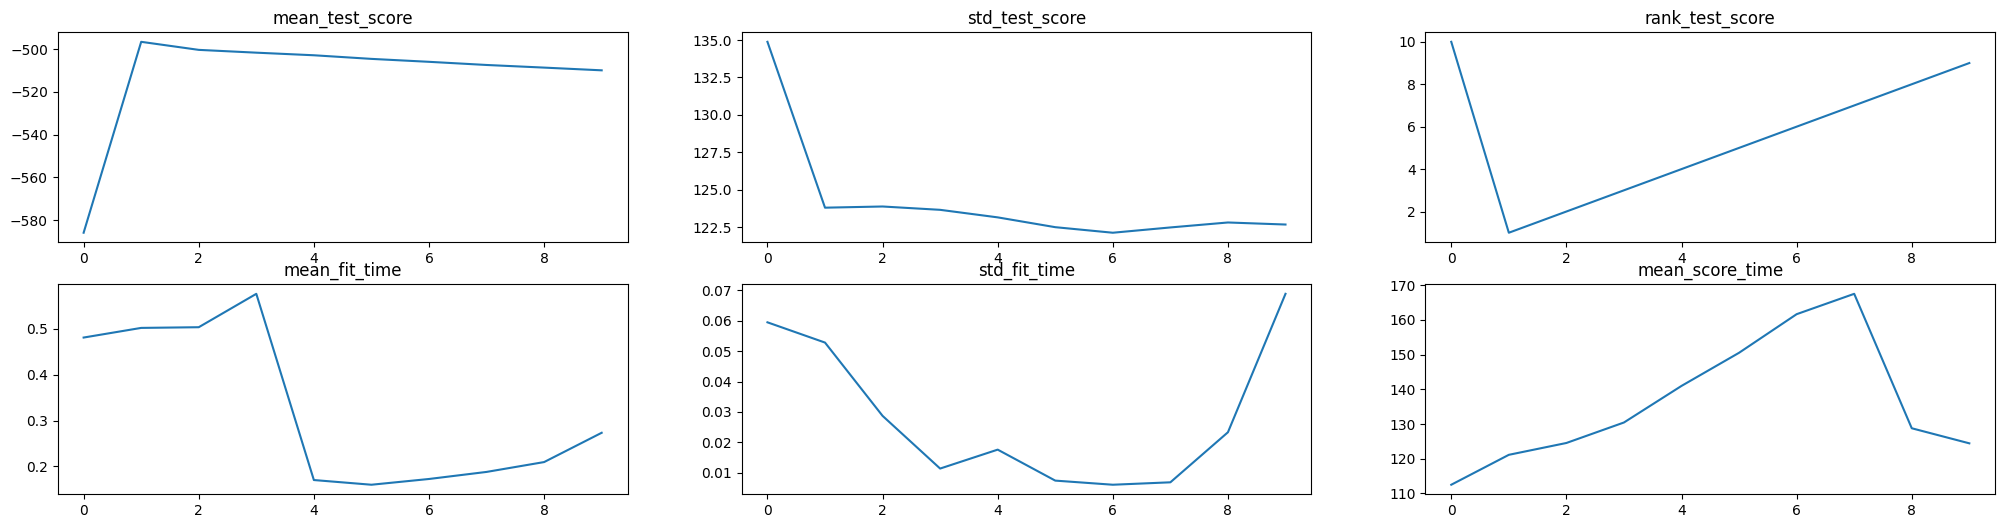

In [29]:
fig, axis = plt.subplots(2, 3, figsize=(25, 6))

for ax, name in zip(axis.flatten(), ["mean_test_score", "std_test_score", "rank_test_score", "mean_fit_time", "std_fit_time", "mean_score_time", "std_score_time"]):
    ax.plot(grid.cv_results_[name])
    ax.set_title(name)

In [30]:
pred_grid_best_estimator = grid.best_estimator_.predict(X_test)

In [31]:
mae_grid = mean_absolute_error(y_test, pred_grid_best_estimator)
mae_grid

461.2593290273234

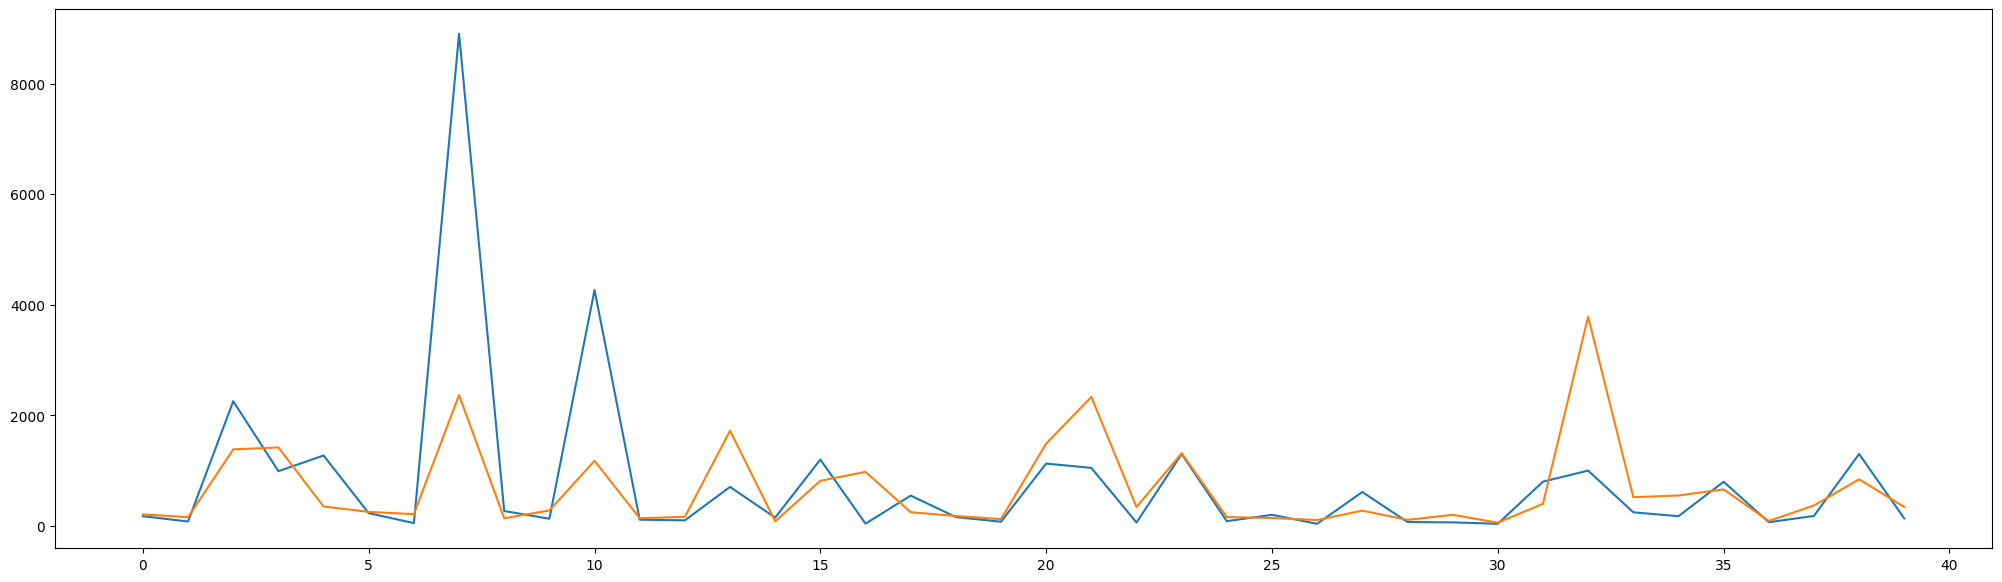

In [32]:
rng = slice(340, 380)

plt.figure(figsize=(25, 7))
plt.plot(y_test[rng].values)
plt.plot(pred_grid_best_estimator[rng])

In [33]:
score_grid = grid.best_estimator_.score(X_test, y_test)
score_grid

0.10878034871697906

In [44]:
results_grid_best_estimator = atomic_benchmark_estimator(grid.best_estimator_, X_test[:5000], verbose=True)

atomic_benchmark runtimes: 0.00699305534362793 0.008524894714355469 0.023518085479736328


<Axes: >

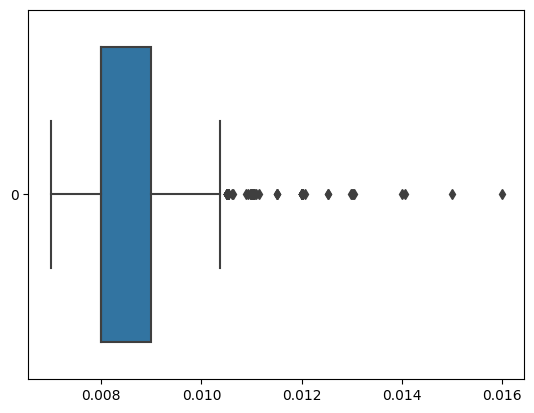

In [35]:
sns.boxplot(results_grid_best_estimator, orient="h")

In [36]:
store_model_performance(
    model_name="KNeighborsRegressor-grid-searched",
    R2_score=score_grid,
    mae=mae_grid,
    avarage_predication_time=results_grid_best_estimator.mean(),
    parameters=grid.best_params_,
)